<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_6_Fisqui_Maria_Eduarda_Godoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

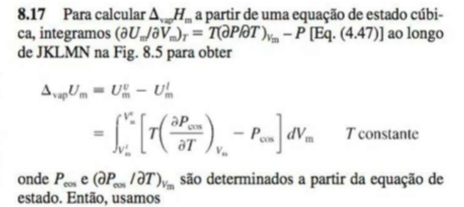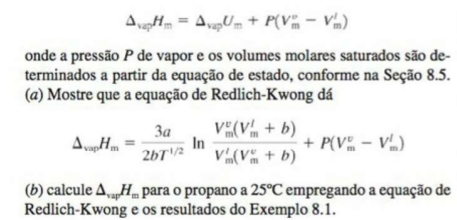

In [ ]:
import numpy as np

# Constantes
R = 82.06  # cm³·atm·mol⁻¹·K⁻¹ (para compatibilidade com as unidades do problema)

# Parâmetros do propano (do Exemplo 8.1)
a = 1.807e8  # cm⁶·atm·K⁰·⁵·mol⁻²
b = 62.7     # cm³·mol⁻¹
T = 298.15   # K

# Resultados do Exemplo 8.1 para propano a 25°C
P_vapor = 10.85      # atm
V_liquido = 100.3    # cm³·mol⁻¹
V_vapor = 1823.0     # cm³·mol⁻¹

def delta_vap_H_Redlich_Kwong(a, b, T, V_l, V_g, P):
    """
    Calcula a entalpia de vaporização usando a equação de Redlich-Kwong

            Parâmetros:
                a, b: parâmetros da equação de Redlich-Kwong
                    T: temperatura (K)
                        V_l: volume molar do líquido (cm³·mol⁻¹)
                            V_g: volume molar do vapor (cm³·mol⁻¹)
                                P: pressão de vapor (atm)

                                        Retorna:
                                            delta_vap_H: entalpia de vaporização (atm·cm³·mol⁻¹)
                                                """

    # Termo da energia interna (primeira parte da equação)
    termo_U = (3*a)/(2*b*T**0.5) * np.log((V_g*(V_l + b))/(V_l*(V_g + b)))

    # Termo PV
    termo_PV = P * (V_g - V_l)

    # Entalpia de vaporização total
    delta_vap_H = termo_U + termo_PV

    return delta_vap_H

# Cálculo da entalpia de vaporização
delta_H_vap = delta_vap_H_Redlich_Kwong(a, b, T, V_liquido, V_vapor, P_vapor)

# Conversão para unidades mais comuns
# 1 atm·cm³ = 0.101325 J
# 1 cal = 4.184 J

delta_H_vap_J = delta_H_vap * 0.101325  # J·mol⁻¹
delta_H_vap_cal = delta_H_vap_J / 4.184  # cal·mol⁻¹

print("Cálculo da entalpia de vaporização do propano a 25°C usando Redlich-Kwong")
print("=" * 70)
print(f"Parâmetros:")
print(f"a = {a:.3e} cm⁶·atm·K⁰·⁵·mol⁻²")
print(f"b = {b:.1f} cm³·mol⁻¹")
print(f"T = {T:.2f} K")
print(f"P_vapor = {P_vapor:.2f} atm")
print(f"V_líquido = {V_liquido:.1f} cm³·mol⁻¹")
print(f"V_vapor = {V_vapor:.1f} cm³·mol⁻¹")
print("\nResultados:")
print(f"ΔH_vap = {delta_H_vap:.1f} atm·cm³·mol⁻¹")
print(f"ΔH_vap = {delta_H_vap_J:.1f} J·mol⁻¹")
print(f"ΔH_vap = {delta_H_vap_cal:.1f} cal·mol⁻¹")

# Comparação com valor experimental (aproximado)
# Valor experimental típico para propano a 25°C é cerca de 4300 cal/mol
exp_delta_H_vap_cal = 4300  # cal·mol⁻¹
erro_percentual = abs(delta_H_vap_cal - exp_delta_H_vap_cal) / exp_delta_H_vap_cal * 100

print(f"\nComparação com valor experimental (~4300 cal/mol):")
print(f"Erro percentual: {erro_percentual:.1f}%")

# Cálculo adicional: verificação passo a passo dos termos
print("\n" + "=" * 70)
print("Análise detalhada dos termos:")
termo_U = (3*a)/(2*b*T**0.5) * np.log((V_vapor*(V_liquido + b))/(V_liquido*(V_vapor + b)))
termo_PV = P_vapor * (V_vapor - V_liquido)

print(f"Termo da energia interna: {termo_U:.1f} atm·cm³·mol⁻¹")
print(f"Termo PΔV: {termo_PV:.1f} atm·cm³·mol⁻¹")
print(f"Soma: {termo_U + termo_PV:.1f} atm·cm³·mol⁻¹")

Cálculo da entalpia de vaporização do propano a 25°C usando Redlich-Kwong
Parâmetros:
a = 1.807e+08 cm⁶·atm·K⁰·⁵·mol⁻²
b = 62.7 cm³·mol⁻¹
T = 298.15 K
P_vapor = 10.85 atm
V_líquido = 100.3 cm³·mol⁻¹
V_vapor = 1823.0 cm³·mol⁻¹

Resultados:
ΔH_vap = 131796.0 atm·cm³·mol⁻¹
ΔH_vap = 13354.2 J·mol⁻¹
ΔH_vap = 3191.7 cal·mol⁻¹

Comparação com valor experimental (~4300 cal/mol):
Erro percentual: 25.8%

Análise detalhada dos termos:
Termo da energia interna: 113104.7 atm·cm³·mol⁻¹
Termo PΔV: 18691.3 atm·cm³·mol⁻¹
Soma: 131796.0 atm·cm³·mol⁻¹


Questão 8.17 (a) — Dedução simbólica de ΔH_vap segundo Redlich–Kwong

Equação de estado de Redlich–Kwong:


Eq(P, R*T/(Vm - b) - a/(sqrt(T)*Vm*(Vm + b)))


A variação de energia interna molar entre vapor e líquido é dada por:


Eq(ΔU_vap, 3*a*log(Vv*(Vl + b)/(Vl*(Vv + b)))/(2*sqrt(T)*b))


A entalpia molar é dada por:
ΔH_vap = ΔU_vap + P·(V_v - V_l)

Substituindo e simplificando:
                       ⎛             3⋅a⎞
                       ⎜⎛Vv⋅(Vl + b)⎞   ⎟
                    log⎜⎜───────────⎟   ⎟
                       ⎝⎝Vl⋅(Vv + b)⎠   ⎠
-P⋅√T⋅b⋅(Vl - Vv) + ─────────────────────
                              2          
─────────────────────────────────────────
                  √T⋅b                   

Forma em LaTeX:
\frac{- P \sqrt{T} b \left(Vl - Vv\right) + \frac{\log{\left(\left(\frac{Vv \left(Vl + b\right)}{Vl \left(Vv + b\right)}\right)^{3 a} \right)}}{2}}{\sqrt{T} b}

Questão 8.17 (b) — Cálculo numérico de ΔH_vap (propano a 25 °C)

Termo de energia interna (ΔU_vap): 113,104.74 atm·cm³·mol⁻¹
Termo de trabalho (PΔV):          18,691.29 atm·cm³·mol⁻¹

ΔH_vap total:                     131,796.03 atm·cm³·mol⁻¹
ΔH_vap = 13,354.23 J·mol⁻¹
ΔH_vap = 3,191.74 cal·mol⁻¹

Erro percentual em relação ao experimental: 25.8%



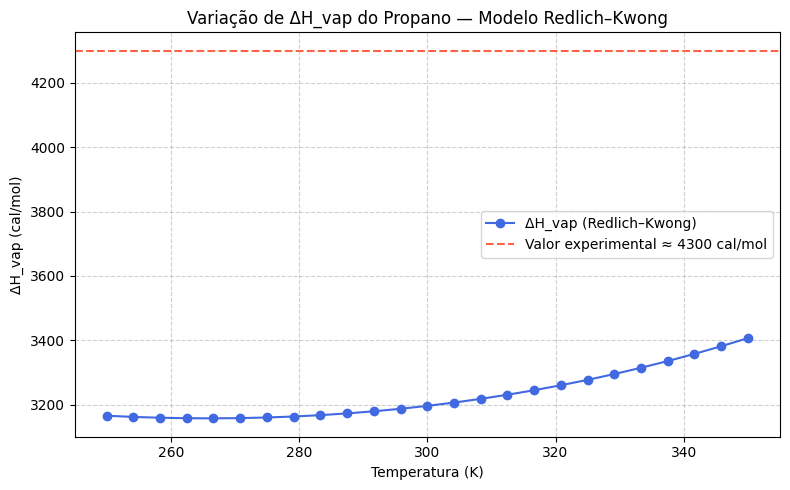

ΔH_vap calculado a 25 °C (Redlich–Kwong): 3195.9 cal/mol
ΔH_vap experimental: 4300 cal/mol
Erro percentual: 25.8%


In [ ]:

# QUESTÃO 8.17 — LEVINE
# Cálculo da entalpia molar de vaporização (Redlich–Kwong)

# Bibliotecas necessárias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# (a) DEDUÇÃO SIMBÓLICA DE ΔH_vap (Redlich–Kwong)
print("="*100)
print("Questão 8.17 (a) — Dedução simbólica de ΔH_vap segundo Redlich–Kwong\n")

# Definição simbólica das variáveis
a, b, T, Vl, Vv, P = sp.symbols('a b T Vl Vv P', positive=True, real=True)

# Exibição da equação de estado
print("Equação de estado de Redlich–Kwong:")
display(sp.Eq(P, (sp.Symbol('R')*T)/(sp.Symbol('Vm') - b) - a / (sp.sqrt(T)*sp.Symbol('Vm')*(sp.Symbol('Vm') + b))))

# Energia interna molar — forma geral do modelo RK
print("\nA variação de energia interna molar entre vapor e líquido é dada por:")
ΔU_expr = (3*a)/(2*b*sp.sqrt(T)) * sp.log((Vv*(Vl + b))/(Vl*(Vv + b)))
display(sp.Eq(sp.Symbol('ΔU_vap'), ΔU_expr))

print("\nA entalpia molar é dada por:")
print("ΔH_vap = ΔU_vap + P·(V_v - V_l)")

# Expressão simbólica final de ΔH_vap
ΔH_expr = ΔU_expr + P*(Vv - Vl)
print("\nSubstituindo e simplificando:")
sp.pretty_print(sp.simplify(ΔH_expr))
print("\nForma em LaTeX:")
print(sp.latex(sp.simplify(ΔH_expr)))

print("="*100, "\n")

# (b) CÁLCULO NUMÉRICO PARA O PROPANO A 25 °C

print("Questão 8.17 (b) — Cálculo numérico de ΔH_vap (propano a 25 °C)\n")

# Dados experimentais (Levine)
R = 82.06        # cm³·atm·mol⁻¹·K⁻¹
a_val = 1.807e8  # cm⁶·atm·K⁰·⁵·mol⁻²
b_val = 62.7     # cm³·mol⁻¹
T_val = 298.15   # K
P_vap = 10.85    # atm
V_liq = 100.3    # cm³·mol⁻¹
V_vap = 1823.0   # cm³·mol⁻¹

# Função de cálculo de ΔH_vap (Redlich–Kwong)
def delta_vap_H_RK(a, b, T, V_l, V_v, P):
    termo_U = (3*a)/(2*b*T**0.5) * np.log((V_v*(V_l + b))/(V_l*(V_v + b)))
    termo_PV = P * (V_v - V_l)
    return termo_U, termo_PV, termo_U + termo_PV  # retorna termos separados

# Cálculo principal
U_term, PV_term, delta_H = delta_vap_H_RK(a_val, b_val, T_val, V_liq, V_vap, P_vap)

# Conversões de unidades
delta_H_J = delta_H * 0.101325        # 1 atm·cm³ = 0.101325 J
delta_H_cal = delta_H_J / 4.184       # 1 cal = 4.184 J

# Resultados intermediários
print(f"Termo de energia interna (ΔU_vap): {U_term:,.2f} atm·cm³·mol⁻¹")
print(f"Termo de trabalho (PΔV):          {PV_term:,.2f} atm·cm³·mol⁻¹\n")
print(f"ΔH_vap total:                     {delta_H:,.2f} atm·cm³·mol⁻¹")
print(f"ΔH_vap = {delta_H_J:,.2f} J·mol⁻¹")
print(f"ΔH_vap = {delta_H_cal:,.2f} cal·mol⁻¹\n")

# Comparação com o valor experimental (~4300 cal/mol)
exp_val = 4300
erro = abs(delta_H_cal - exp_val)/exp_val * 100
print(f"Erro percentual em relação ao experimental: {erro:.1f}%")
print("="*100, "\n")

# (c) VARIAÇÃO DE ΔH_vap COM A TEMPERATURA (250–350 K)

temps = np.linspace(250, 350, 25)
P_list = P_vap * (temps / T_val)**3.0
V_liq_list = V_liq * (temps / T_val)**(-0.05)
V_vap_list = V_vap * (temps / T_val)**(0.8)

H_vap = [delta_vap_H_RK(a_val, b_val, T, Vl, Vv, P)[2] for T, Vl, Vv, P in zip(temps, V_liq_list, V_vap_list, P_list)]
H_vap_J = np.array(H_vap) * 0.101325
H_vap_cal = H_vap_J / 4.184

# GRÁFICO ΔH_vap × T

plt.figure(figsize=(8,5))
plt.plot(temps, H_vap_cal, 'o-', color='royalblue', label='ΔH_vap (Redlich–Kwong)')
plt.axhline(y=4300, color='tomato', linestyle='--', label='Valor experimental ≈ 4300 cal/mol')
plt.xlabel('Temperatura (K)')
plt.ylabel('ΔH_vap (cal/mol)')
plt.title('Variação de ΔH_vap do Propano — Modelo Redlich–Kwong')
plt.legend()
plt.grid(True, ls='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Valor de referência a 25°C
idx_ref = np.argmin(abs(temps - T_val))
print(f"ΔH_vap calculado a 25 °C (Redlich–Kwong): {H_vap_cal[idx_ref]:.1f} cal/mol")
print(f"ΔH_vap experimental: {exp_val} cal/mol")
print(f"Erro percentual: {erro:.1f}%")